<a href="https://colab.research.google.com/github/Sonal-Sukanya/Its-my-repository/blob/main/IPR_TPR_PLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Inflow Performance Relationship (IPR) curve represents the reservoir's ability to deliver fluids to the wellbore, showing how bottomhole pressure (Pwf) changes with flowrate. In contrast, the Tubing Performance Relationship (TPR) curve illustrates how much pressure is needed to lift fluids to the surface through a specific tubing size. As tubing size increases, the frictional pressure loss decreases, and the fluid velocity drops. However, there comes a point where the reduced velocity is insufficient to lift the fluids, making larger tubing counterproductive. Plotting both curves together helps identify the operating point where inflow matches outflow — a key concept in nodal analysis for optimizing well performance.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#IPR Dataset (Source: Petrowiki)

ipr = pd.DataFrame({
    'Pwf': [4000, 3500, 3000, 2500, 2000, 1500, 1000, 500, 14.7],
    'Q':   [0, 1999, 3094, 3902, 4512, 4963, 5275, 5458, 5519]
})
display(ipr)

,Pwf,Q
0,4000.0,0
1,3500.0,1999
2,3000.0,3094
3,2500.0,3902
4,2000.0,4512
5,1500.0,4963
6,1000.0,5275
7,500.0,5458
8,14.7,5519


In [6]:
q = np.arange(1000, 6500, 500)

p_190 =   [1334, 1400, 1487, 1592, 1712, 1843, 1984, 2132, 2287, 2446, 2609]
p_2375 = [1298, 1320, 1351, 1390, 1435, 1487, 1545, 1609, 1677, 1749, 1824]
p_2875 = [1286, 1294, 1305, 1319, 1336, 1356, 1378, 1403, 1431, 1461, 1493]

tpr = pd.DataFrame({
    'q': q,
    'Pwf(1.90" tbg)': p_190,
    'Pwf(2.375"tbg)': p_2375,
    'Pwf(2.875"tbg)': p_2875
})
display(tpr)

,q,"Pwf(1.90"" tbg)","Pwf(2.375""tbg)","Pwf(2.875""tbg)"
0,1000,1334,1298,1286
1,1500,1400,1320,1294
2,2000,1487,1351,1305
3,2500,1592,1390,1319
4,3000,1712,1435,1336
5,3500,1843,1487,1356
6,4000,1984,1545,1378
7,4500,2132,1609,1403
8,5000,2287,1677,1431
9,5500,2446,1749,1461


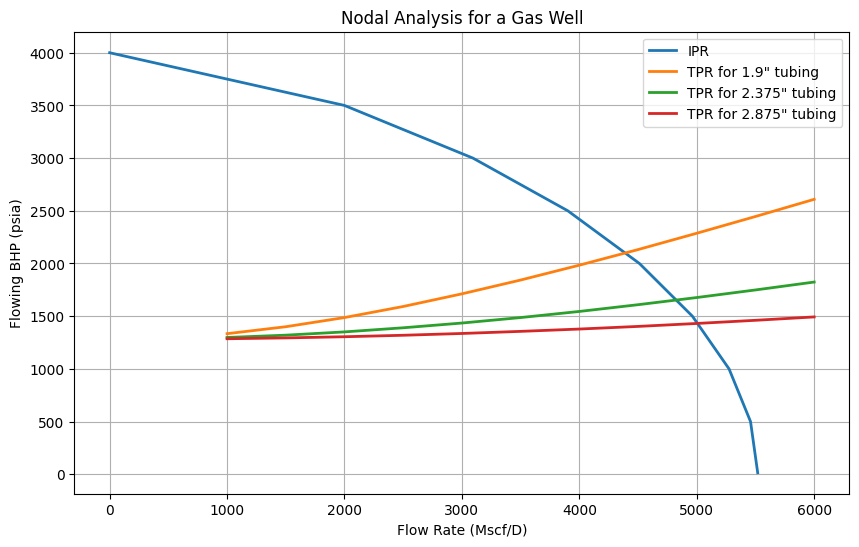

In [9]:
#Plotting the flowing bottomhole pressure vs flowrate
plt.figure(figsize=(10, 6))
plt.plot(ipr['Q'], ipr['Pwf'], label='IPR', linewidth=2)
plt.plot(tpr['q'], tpr['Pwf(1.90" tbg)'], label='TPR for 1.9" tubing', linewidth=2)
plt.plot(tpr['q'], tpr['Pwf(2.375"tbg)'], label='TPR for 2.375" tubing', linewidth=2)
plt.plot(tpr['q'], tpr['Pwf(2.875"tbg)'], label='TPR for 2.875" tubing', linewidth=2)

plt.xlabel('Flow Rate (Mscf/D)')
plt.ylabel('Flowing BHP (psia)')
plt.title('Nodal Analysis for a Gas Well')
plt.grid()
plt.legend()
plt.show()